# Modelarea Datelor


## Pandas

Pandas este o librărie Python utilizată pentru a lucra cu date tabulare. Pentru a crea dataframe-ul putem citi datele dintr-un fișier (excel, csv etc.) sau pornind de la un dicționar. Documentația completă poate fi citită aici: https://pandas.pydata.org/docs/index.html


In [1]:
import pandas as pd

my_dict = {"cars": ["BMW", "Volvo", "Ford"], "passings": [3, 7, 2]}

df = pd.DataFrame(my_dict)
df

,cars,passings
0,BMW,3
1,Volvo,7
2,Ford,2


Putem adăuga linii și coloane manual:


In [2]:
df = pd.concat(
    [df, pd.DataFrame({"cars": ["Skoda"], "passings": [10]})], ignore_index=True
)
df

,cars,passings
0,BMW,3
1,Volvo,7
2,Ford,2
3,Skoda,10


In [3]:
df["Colors"] = ["red", "black", "white", "red"]
df

,cars,passings,Colors
0,BMW,3,red
1,Volvo,7,black
2,Ford,2,white
3,Skoda,10,red


In [4]:
df["Paragraph"] = [1, 2, 2, 3]
df["Sentence"] = [1, 1, 2, 1]
df

,cars,passings,Colors,Paragraph,Sentence
0,BMW,3,red,1,1
1,Volvo,7,black,2,1
2,Ford,2,white,2,2
3,Skoda,10,red,3,1


Sau le putem elimina:


In [5]:
df = df.drop(columns=["passings"])
df

,cars,Colors,Paragraph,Sentence
0,BMW,red,1,1
1,Volvo,black,2,1
2,Ford,white,2,2
3,Skoda,red,3,1


In [6]:
df = df.drop([len(df) - 1])
df

,cars,Colors,Paragraph,Sentence
0,BMW,red,1,1
1,Volvo,black,2,1
2,Ford,white,2,2


Putem adăuga coloane noi pe baza celor deja existente folosind operații simple (dacă ne interesează valoarea completă din celule) sau lamba funcții (dacă vrem să facem diverse operații pe elementele din celule):


In [7]:
df["Full info"] = df["cars"] + " " + df["Colors"]
df["Model length"] = df["cars"].apply(lambda car: len(car))
df

,cars,Colors,Paragraph,Sentence,Full info,Model length
0,BMW,red,1,1,BMW red,3
1,Volvo,black,2,1,Volvo black,5
2,Ford,white,2,2,Ford white,4


Pentru fiecare coloană putem vedea o descriere generală:


In [8]:
df.describe()

,Paragraph,Sentence,Model length
count,3.000000,3.000000,3.0
mean,1.666667,1.333333,4.0
std,0.577350,0.577350,1.0
min,1.000000,1.000000,3.0
25%,1.500000,1.000000,3.5
50%,2.000000,1.000000,4.0
75%,2.000000,1.500000,4.5
max,2.000000,2.000000,5.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cars          3 non-null      object
 1   Colors        3 non-null      object
 2   Paragraph     3 non-null      int64 
 3   Sentence      3 non-null      int64 
 4   Full info     3 non-null      object
 5   Model length  3 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 276.0+ bytes


Valoarea maximă:


In [10]:
df.max()

cars                  Volvo
Colors                white
Paragraph                 2
Sentence                  2
Full info       Volvo black
Model length              5
dtype: object

Și valoarea medie:


In [11]:
df_numerical = df[["Paragraph", "Sentence", "Model length"]]
df_numerical.mean()

Paragraph       1.666667
Sentence        1.333333
Model length    4.000000
dtype: float64

Sau putem filtra după o anumită condiție:


In [12]:
df[df["Model length"] > 3]

,cars,Colors,Paragraph,Sentence,Full info,Model length
1,Volvo,black,2,1,Volvo black,5
2,Ford,white,2,2,Ford white,4


#### _EXERCIȚIU_

Creează un dataframe pornind de la excelul sau fișierul csv creat la exercițiul de data trecută. Accesează elementul de pe linia 0, coloana 1 și păstrează doar liniile din dataframe care conțin acea valoare pe orice coloană.


---


## Matplotlib

Matplotlib este o librărie utilizată pentru a reprezenta vizual date statistice. Cea mai simplă reprezentare o constituie graficele:


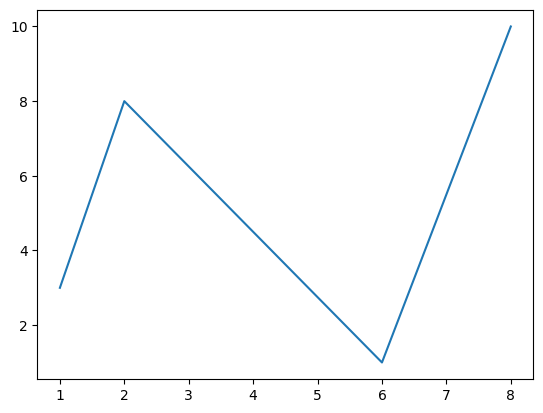

In [13]:
import matplotlib.pyplot as plt

xpoints = [1, 2, 6, 8]
ypoints = [3, 8, 1, 10]

plt.plot(xpoints, ypoints)
plt.show()

Observați cum graficul unește punctele precizate prin lista de coordonate x și coordonate y. Pe acest grafic putem adăuga label-uri celor 2 axe, dar putem și să customizăm marcajele mai mult de atât:


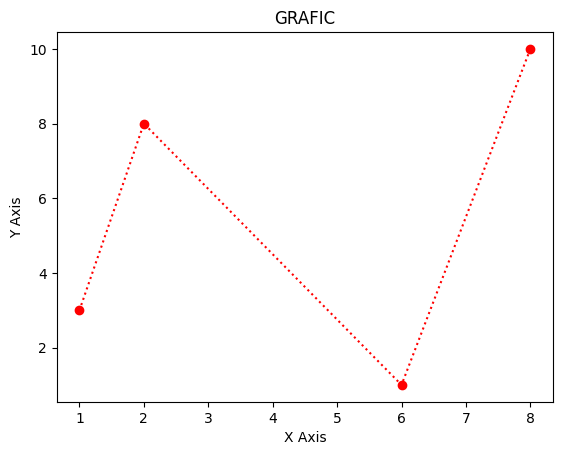

In [14]:
plt.title("GRAFIC")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

plt.plot(xpoints, ypoints, "o:r")
plt.show()

În exemplul de mai sus am folosit reprezentarea [simbol][linie][culoare] pentru a descrie formatul graficului.


Afișarea cu _.plot()_ am stabilit că formează grafice ca mai sus. Alte variante de reprezentări sunt plot bars -- _.bar()_ -- sau histogramele -- _.hist()_ --, care se apelează la fel, dar se customizează diferit.


#### _EXERCIȚIU_

Creează un plot format din 2 subplot-uri după cum urmează:

1. Două liste de puncte cu culori și simboluri diferite de cele utilizate până acum reprezentate pe același grafic.
2. Orice plot bar sau histogramă cu o culoare diferită de cea originală.


---


Documentația completă matplotlib: https://matplotlib.org/stable/index.html


## Wordcloud

Wordcloud este o altă librărie care ne ajută să analizăm textul. Mai exact, pentru un text dat această librărie reprezintă frecvența apariției fiecărui cuvânt prin dimensiunea acestuia în imaginea creeată:


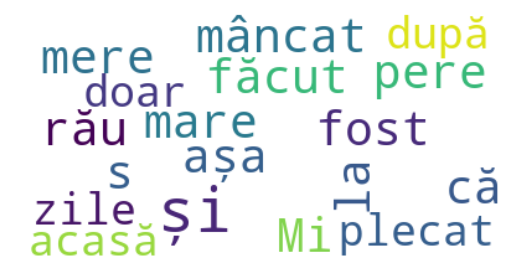

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white")
wordcloud_picture = wordcloud.generate(
    "Am fost la mare și am mâncat 2 mere și 2 pere. Mi s-a făcut rău așa că am plecat acasă după doar 2 zile."
)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Obervați cum cuvintele care apar cel mai des în text sunt mai mari decât celelalte în _wordcloud-ul_ string-ului. Funcția împarte automat textul în cuvinte individuale și elimină numerele și semnele de punctuație. Desigur, cu cât avem mai multe cuvinte cu atât desenul e mai complet și diferențele sunt mai evidente.


# Web Scraping


Uneori avem nevoie de o cantitate mare de informații de pe internet -- fie că vrem să creăm un corpus (dataset), fie că vrem să ne automatizăm munca în alte moduri.


De exemplu, să zicem că vrem să extragem toate submisiile unui utilizator de pe infoarena pentru a ne uita la statistici.

Pentru moment doar o să copiem linkul pe care vrem să îl accesăm și o să extragem conținutul.


In [16]:
import requests
import pandas as pd

url = "https://www.infoarena.ro/monitor?user=brandon"
html = requests.get(url)
df = pd.read_html(html.content)[1]
df.head()

,ID,Utilizator,Problema,Runda,Marime,Data,Stare
0,#3208075,Chris Luntraru Brandon,Clepsidra,Arhiva de probleme,1.48 kb,27 feb 24 17:28:37,Evaluare completa: 100 puncte
1,#3208073,Chris Luntraru Brandon,Mostenire3,Arhiva de probleme,1.48 kb,27 feb 24 17:25:54,Evaluare completa: 0 puncte
2,#3201333,Chris Luntraru Brandon,Muzeu,Arhiva de probleme,1.60 kb,7 feb 24 16:49:24,Evaluare completa: 100 puncte
3,#3201326,Chris Luntraru Brandon,Muzeu,Arhiva de probleme,1.54 kb,7 feb 24 16:39:49,Evaluare completa: 10 puncte
4,#2764915,Chris Luntraru Brandon,Algoritmul Bellman-Ford,Arhiva educationala,2.06 kb,23 iul 21 15:53:57,Evaluare completa: 35 puncte


#### _EXERCIȚIU_

Ai observat că în exemplul de mai sus sunt afișate doar ultimele 25 de submisii ale utilizatorului? Uită-te cum se modifică linkul atunci când treci de la o pagină la alta și simulează acest proces pentru a crea un dataframe care include toate submisiile făcute de Chris pe infoarena vreodată.


#### _SOLUȚIE_


In [18]:
# @title
url = f"https://www.infoarena.ro/monitor?user=brandon&display_entries={25}&first_entry={25}"
html = requests.get(url)
df = pd.read_html(html.content)[1]
df.head()

,ID,Utilizator,Problema,Runda,Marime,Data,Stare
0,#2273357,Chris Luntraru Brandon,Inv,Arhiva de probleme,0.42 kb,31 oct 18 14:29:52,Evaluare completa: 20 puncte
1,#2268154,Chris Luntraru Brandon,Hacker3,Arhiva de probleme,1.68 kb,24 oct 18 15:33:19,Evaluare completa: 100 puncte
2,#2268137,Chris Luntraru Brandon,Hacker3,Arhiva de probleme,1.70 kb,24 oct 18 15:16:09,Evaluare completa: 0 puncte
3,#2268133,Chris Luntraru Brandon,Hacker3,Arhiva de probleme,1.68 kb,24 oct 18 15:11:11,Evaluare completa: 0 puncte
4,#2268108,Chris Luntraru Brandon,Hacker3,Arhiva de probleme,1.45 kb,24 oct 18 15:01:28,Evaluare completa: 95 puncte


---


# EXERCIȚII

Acum că știm bazele e momentul să le punem cap la cap și să analizăm un set de date. Acest pas e important înainte de a începe să scriem orice cod de ML pentru că ne ajută să ne dăm seama cum trebuie abordat corpusul pe care lucrăm -- Ce feature-uri sunt importante? Ce eliminăm la preprocesare? Lucrăm pe un set de date echilibrat? Etc...

Tema voastră cere să scrieți o clasă care vă creează un dataset pe care îl vom analiza. Exercițiile pot fi rezolvate în orice ordine, dar toate (în afară de 1 unde creăm clasa) se vor rezolva ca funcții în interiorul clasei și vor fi apelate pentru a le testa. Internetul este prietenul tău, chatGPT nu neapărat...


1. Creează o clasă cu variabile statice. Definește funcția implicită de inițializare și funcția implicită de afișare respectând următoarele precizări:

- pentru un website de algoritmică și un username date ca parametru la inițializare clasa va crea dataframe-ul care conține tot istoricul problemelor trimise de acel user pe site-ul respectiv. Programul trebuie să funcționeze pentru cel puțin 2 website-uri competitive. Funcția de inițializare va avea parametrii default pentru username și website, iar dataframe-ul va fi păstrat într-o variabilă statică.
- modifică dataframe-ul astfel încât să aibă aceleași coloane indiferent de website-ul de pe care au fost extrase.
- funcția de afișare a clasei va afișa acest dataframe


2. Alege-ți 2 coloane din dataframe pe care să le analizezi. Creează minim o histogramă și un pie chart pentru distribuțiile elementelor de pe coloanele respective. E vreuna din aceste coloane relevantă pentru scor?


3. Scrie o funcție care, pentru cel puțin unul dintre site-uri, accesează pagina problemei, extrage o informație nouă despre problema respectivă și o adaugă în dataframe-ul nostru. Această informație este relevantă pentru scor?


4. Creează un wordcloud cu numele problemelor abordate pentru a vedea care au fost problemele cu cele mai multe submisii. Care pare să fie tendința acestui utilizator pentru a rezolva probleme? Au fost câteva probleme mai grele pentru el sau trimite multe surse în general?


5. Împarte data și ora submisiei în coloane separate cu același format. Creează o coloană de scor, sau înlocuiește-o pe cea deja existentă astfel încât să conțină doar punctajul numeric, fără alt text. Atenție la informațiile extrase de pe site-uri diferite!


6. Salvează dataframe-ul într-un fișier cu calea citită de la tastatură.


---
